https://www.kaggle.com/code/carolinaemanuele/smoke-detection-analysis

Unnamed:0: Index

UTC: Time in UTC Seconds

Temperature[C]: Air Temperature

Humidity[%]: Air Humidity

TVOC[ppb]: Total Volatile Organic Compounds (measured in parts per billion)

eCO2[ppm]: Equivalent CO2 Concentration (measured in parts per million)

Raw H2: Raw Molecular Hydrogen, uncompensated (bias, temperature, etc.)

Raw Ethanol: Raw Gaseous Ethanol

Pressure[hPA]: Air Pressure

PM1.0: Particulate matter size < 1.0 µm (PM1.0)

PM2.5: Particulate matter size >1.0 µm and < 2.5 µm (PM2.5)

NC0.5: Numeric concentration of particulate matter size < 0.5 µm (NC0.5)

NC1.0: Numeric concentration of particulate matter size 0.5 µm < 1.0 µm (NC1.0)

NC2.5: Numeric concentration of particulate matter size 1.0 µm < 2.5 µm (NC2.5)

CNT: Sample Counter

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold  
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  ,cross_val_score ,GridSearchCV , KFold , train_test_split
from sklearn.metrics import  confusion_matrix , classification_report,accuracy_score, make_scorer
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import RepeatedStratifiedKFold

---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------


https://www.kaggle.com/code/najeeburrehmanmscs/smoke-detection

In [29]:
df = pd.read_csv('./data/smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [30]:
df.drop(['Unnamed: 0', 'UTC','CNT'], axis = 1, inplace = True)

In [31]:
for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [32]:
X = df.drop('Fire Alarm', axis=1)
y = df['Fire Alarm']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
X_train.shape,X_test.shape

((43841, 12), (18789, 12))

In [35]:
from sklearn.feature_selection import VarianceThreshold

In [36]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [37]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [38]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [41]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

4

In [43]:
corr_features

{'NC0.5', 'NC1.0', 'NC2.5', 'PM2.5'}

In [44]:
X_train.drop(corr_features,axis=1)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0
1062,27.119,53.28,24,400,13034,19931,939.785,0.40
36659,26.830,47.35,1046,602,12815,19466,939.058,2.17
45946,26.680,48.51,1367,422,12941,19382,938.688,1.94
4379,-4.220,54.16,107,400,13229,20117,939.656,2.32
22558,-19.427,54.14,1304,400,12963,19405,938.754,1.81
...,...,...,...,...,...,...,...,...
45891,26.830,47.93,1354,417,12948,19391,938.705,1.99
52416,26.060,47.16,108,408,12778,20634,937.469,2.22
42613,24.900,51.90,1141,400,12906,19445,938.721,1.52
43567,25.380,48.91,1281,424,12902,19406,938.740,1.69


In [45]:
columns_drop = ['NC0.5', 'NC1.0', 'NC2.5', 'PM2.5']

In [46]:
# Remove the categorical data
df.drop(columns_drop, axis=1, inplace=True)
df.shape

(62630, 9)

In [47]:
X = df.drop('Fire Alarm', axis=1)
y = df['Fire Alarm']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [50]:
X_train.shape, y_train.shape

((43841, 8), (43841,))

In [72]:
X_train[2000]

array([-0.32289217,  0.90489793, -0.24579607, -0.1401907 , -0.87341218,
       -0.03255805,  0.90953795, -0.10732552])

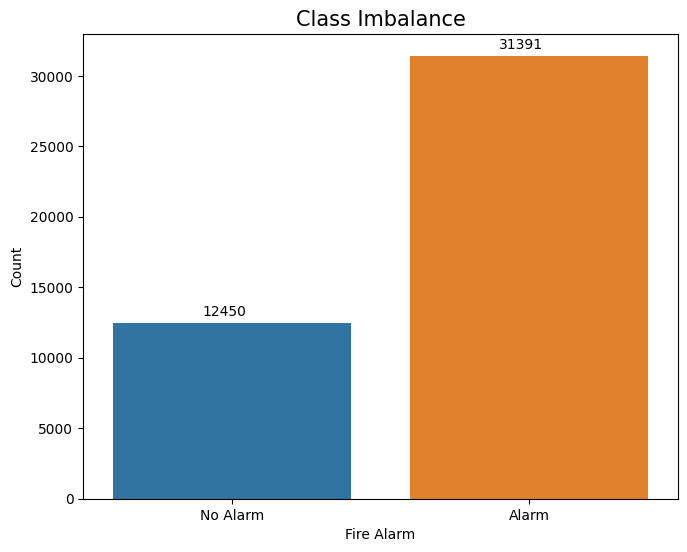

In [54]:
sns.countplot(x = y_train)
plt.text(x = 0 - 0.1, y = y_train.value_counts()[0] + 500, s = y_train.value_counts()[0])
plt.text(x = 1 - 0.1, y = y_train.value_counts()[1] + 500, s = y_train.value_counts()[1])
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.ylabel('Count')
plt.tight_layout(pad = -1)
plt.title('Class Imbalance', fontsize = 15)
plt.show()

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10) 
X_train, y_train = smote.fit_resample(X_train, y_train)

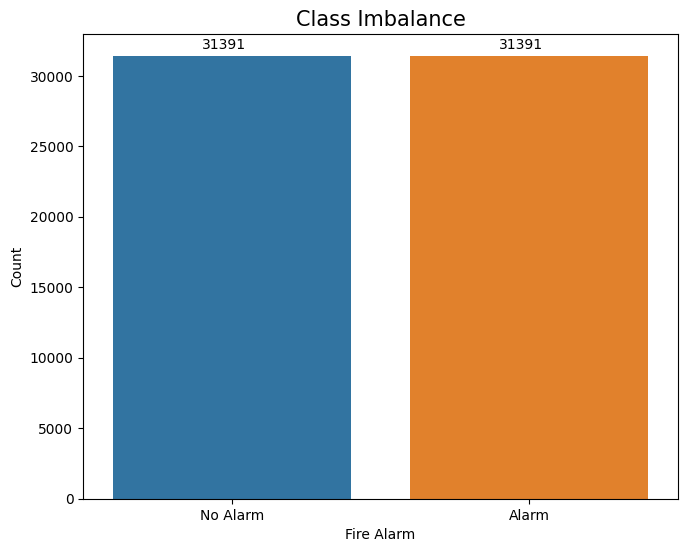

In [59]:
sns.countplot(x = y_train)
plt.text(x = 0 - 0.1, y = y_train.value_counts()[0] + 500, s = y_train.value_counts()[0])
plt.text(x = 1 - 0.1, y = y_train.value_counts()[1] + 500, s = y_train.value_counts()[1])
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.ylabel('Count')
plt.tight_layout(pad = -1)
plt.title('Class Imbalance', fontsize = 15)
plt.show()

In [60]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# The confusion matrix allows us to identify the number of correct 
# and incorrect predictions for each target class.
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm, 
                               columns = ['Predicted: No Alarm', 'Predicted: Alarm'], 
                               index = ['Actual: No Alarm', 'Actual: Alarm'])
    sns.heatmap(conf_matrix, annot = True, cbar = False, fmt = 'd', linewidth = 0.5, annot_kws = {'size': 25})
    plt.xticks()
    plt.yticks()
    plt.title(model_name + " Confusion Matrix", fontsize = 20)
    plt.show()

# The ROC curve (receiver operating characteristic curve) is a graph showing the performance of 
# a classification model by plotting True Positive Rate (TPR) vs. False Positive Rate (FPR) 
# at different classification thresholds. The Area Under Curve (AUC) is simply the area under 
# the ROC curve and it is representative of how well the model can distinguish between the target classes.
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0,1], [0,1], 'r--')
    plt.title('ROC Curve for ' + model_name + ' Classifier', fontsize = 15)
    plt.xlabel('False Positive Rate (1- Specificity)', fontsize = 12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 12)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred), 4)))
    plt.grid(True)

# Defining a dataframe for tallying the evaluation metrics of all models.
# This will serve as our score card.
score_card = pd.DataFrame(columns = ['Model', 'Precision Score', 'Recall Score', 'f1-Score', 'AUC Score', 'Accuracy Score','CV Score'])

# Defining an iterable to set the appropriate index upon insertion of a new model's metrics:
index_iter = iter(range(1, 10))

# update_score_card updates the score card model name, the target classes 
# and the corresponding model predictions.
def update_score_card(y_test, y_pred, model_name):
    global score_card
    new_score = pd.DataFrame({'Model': model_name, 
                              'Precision Score': metrics.precision_score(y_test, y_pred), 
                              'Recall Score': metrics.recall_score(y_test, y_pred), 
                              'f1-Score': metrics.f1_score(y_test, y_pred), 
                              'AUC Score': roc_auc_score(y_test, y_pred), 
                              'Accuracy Score':metrics.accuracy_score(y_test, y_pred),
                              'CV Score':n_scores.mean()}, 
                             index = [next(index_iter)])
    score_card = pd.concat([score_card, new_score])
    return score_card

In [61]:
from sklearn.linear_model import LogisticRegression
R_model = RandomForestClassifier()
R_model.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred_R_model = R_model.predict(X_test)
import joblib

# Giả sử R_model là mô hình của bạn
# Lưu mô hình vào file 'r_model.pkl'
joblib.dump(R_model, 'r_model.pkl')

['r_model.pkl']

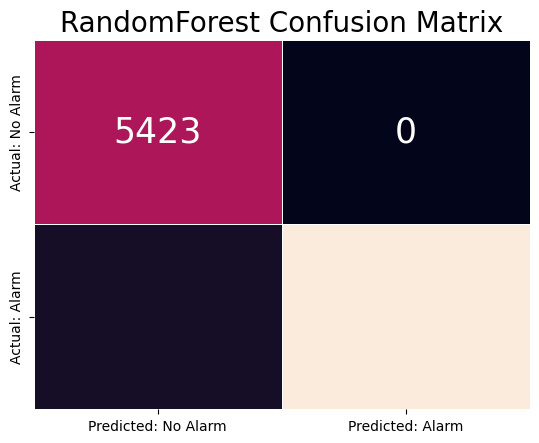

In [64]:
plot_confusion_matrix(y_test, y_pred_R_model, 'RandomForest')

In [65]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(R_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores

array([1.        , 1.        , 0.99984033, 1.        , 1.        ,
       0.999521  , 1.        , 0.99984033, 0.99984033, 1.        ,
       0.99984033, 0.99984033, 1.        , 1.        , 0.99984033,
       0.99984033, 1.        , 1.        , 0.99984033, 1.        ,
       0.999521  , 1.        , 0.99984033, 0.99984033, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99968066])

In [66]:
n_scores.mean()

0.9999041992655276

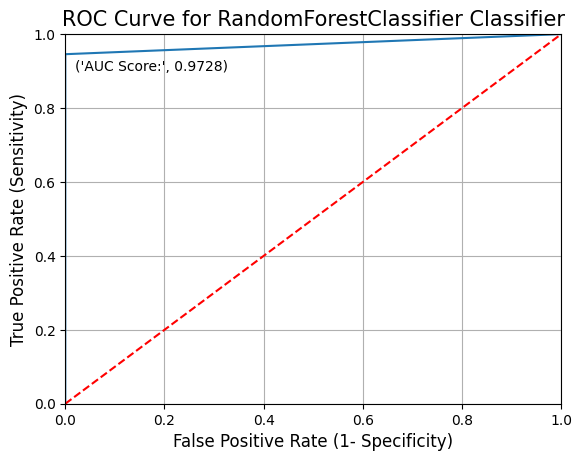

In [67]:
plot_roc(y_test, y_pred_R_model, 'RandomForestClassifier')

In [68]:
update_score_card(y_test, y_pred_R_model, 'RandomForest Classifier(RF)')

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score,CV Score
1,RandomForest Classifier(RF),1.0,0.945683,0.972083,0.972842,0.96136,0.999904
